# Import các thư viện cần thiết

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy

# Dữ liệu

## Chủ đề

Với những tín đồ của bộ môn nghệ thuật thứ 7, việc thưởng thức những bộ phim bom tấn, ăn khách giờ đây không còn gói gọn ở rạp chiếu phim màn ảnh rộng, mà ngay trong chính những thiết bị thông minh cá nhân thông qua kết nối Internet. Nền tảng streaming phim giờ đây bùng nổ mạnh mẽ và tạo ra thị trường cạnh tranh khốc liệt. Thông qua tìm hiểu những "ông lớn" hiện đang thống lĩnh thị trường streaming film, như Netflix, Hulu, Prime Video, Disney+... chúng ta đưa ra được những góc nhìn và đánh giá khách quan về khả năng phát triển và sự đa dạng trong nội dung, số lượng phim... đồng thời là sự thành công trong việc đón đầu xu hướng và đáp ứng nhu cầu, thị hiếu khán giả trong bối cảnh thời đại mới.

## Thu thập dữ liệu

Dữ liệu trong bài là tổ hợp dữ liệu được cấu thành từ 2 thành phần:

- Dữ liệu được thu thập từ trang web Reelgood.com, bao gồm một danh sách toàn diện và dễ hiểu về các bộ phim hiện đang có sẵn trên nhiều nền tảng streaming khác nhau.

- Dữ liệu đánh giá từ IMDb.

Bộ dữ liệu được sử dụng trong bài từ trang web Kaggle. Chi tiết về dữ liệu có thể xem [ở đây](https://www.kaggle.com/ruchi798/movies-on-netflix-prime-video-hulu-and-disney)

# Khám phá dữ liệu

## Đọc dữ liệu từ file csv

In [74]:
stream_df = pd.read_csv('streaming.csv')
stream_df.head()

,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,1,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,2,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,3,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,4,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0


## Tổng quan về dữ liệu

Trước tiên, chúng ta cùng nhìn qua thông tin về dữ liệu.

In [75]:
stream_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16744 entries, 0 to 16743
Data columns (total 16 columns):
ID                 16744 non-null int64
Title              16744 non-null object
Year               16744 non-null int64
Age                7354 non-null object
IMDb               16173 non-null float64
Rotten Tomatoes    5158 non-null object
Netflix            16744 non-null int64
Hulu               16744 non-null int64
Prime Video        16744 non-null int64
Disney+            16744 non-null int64
Type               16744 non-null int64
Directors          16018 non-null object
Genres             16469 non-null object
Country            16309 non-null object
Language           16145 non-null object
Runtime            16152 non-null float64
dtypes: float64(2), int64(7), object(7)
memory usage: 2.0+ MB


Dữ liệu bao gồm 16744 dòng và 16 cột, và ý nghĩa của từng cột dữ liệu được mô tả như sau:

- **ID**: unique movie ID.
- **Title**: movie title.
- **Year**: the year in which the movie was produced.
- **Age**: target age group audience.
- **IMDb**: IMDb rating.
- **Rotten Tomatoes**: Rotten Tomatoes percentage.
- **Netflix**: whether the movie is found on Netflix (1 if available and 0 if not available).
- **Hulu**: whether the movie is found on Hulu (1 if available and 0 if not available).
- **Prime Video**: whether the movie is found on Prime Video (1 if available and 0 if not available).
- **Disney+**: whether the movie is found on Disney+ (1 if available and 0 if not available).
- **Type**: movie or TV series (0 for movie and 1 for TV series).
- **Directors**: directors of the movie.
- **Genres**: genres of the movie.
- **Country**: country which produce the movie.
- **Language**: language used in the movie.
- **Run time**: the length of the movie.

Nhìn vào dữ liệu trong dataframe, có thể nhận thấy mỗi dòng ứng với thông tin của một bộ phim.

Chúng ta có thể tham khảo thêm về các giá trị đặc trưng của từng cột dữ liệu dạng numeric.

In [76]:
stream_df.describe()

,ID,Year,IMDb,Netflix,Hulu,Prime Video,Disney+,Type,Runtime
count,16744.000000,16744.000000,16173.000000,16744.000000,16744.000000,16744.000000,16744.000000,16744.0,16152.000000
mean,8372.500000,2003.014035,5.902751,0.212613,0.053930,0.737817,0.033684,0.0,93.413447
std,4833.720789,20.674321,1.347867,0.409169,0.225886,0.439835,0.180419,0.0,28.219222
min,1.000000,1902.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000
25%,4186.750000,2000.000000,5.100000,0.000000,0.000000,0.000000,0.000000,0.0,82.000000
50%,8372.500000,2012.000000,6.100000,0.000000,0.000000,1.000000,0.000000,0.0,92.000000
75%,12558.250000,2016.000000,6.900000,0.000000,0.000000,1.000000,0.000000,0.0,104.000000
max,16744.000000,2020.000000,9.300000,1.000000,1.000000,1.000000,1.000000,0.0,1256.000000


# Tiền xử lý dữ liệu

Trước tiên, từ tổng quan dữ liệu ở trên, chúng ta nhận thấy rằng cột Rotten Tomatoes dữ liệu hoàn toàn lệch về phía giá trị 0. Điều này cho chúng ta nhận xét đầu tiên: mỗi dòng trong dataframe đều thể hiện thông tin về một bộ phim nào đó và hoàn toàn không có TV series nào trong dataframe. Như vậy chúng ta có thể bỏ cột này mà không ảnh hưởng đến dữ liệu đang xét.

In [77]:
stream_df.drop('Rotten Tomatoes', axis = 1, inplace = True)

Tiếp theo, chúng ta tiến hành xem xét số giá trị NULL trên mỗi cột thuộc tính.

In [78]:
stream_df.isnull().sum()

ID                0
Title             0
Year              0
Age            9390
IMDb            571
Netflix           0
Hulu              0
Prime Video       0
Disney+           0
Type              0
Directors       726
Genres          275
Country         435
Language        599
Runtime         592
dtype: int64

Nhận thấy rằng, cột Age trong dataframe bị miss dữ liệu rất nhiều (hơn 50%, nếu chúng ta so với phần mô tả dữ liệu ở trên), ngoài ra các cột Directors, Genres, Country, Language, Runtime cũng bị miss dữ liệu nhưng không đáng kể. 

Chúng ta có thể xử lý bằng cách bỏ đi cột Age. Nhưng vấn đề là, khi xét đến một bộ phim, yếu tố độ tuổi của người xem là rất quan trọng, để chúng ta nhận xét được phân bố các bộ phim theo độ tuổi như thế nào. Vì vây, không nên bỏ đi cột Age ở đây, chúng ta chỉ fill bằng NA, nhằm chỉ thị rằng bộ phim đang xét chưa có thông tin về phân độ tuổi. Tương tự, cách đánh giá và fill này cũng áp dụng cho các cột Directors, Genres, Language, Runtime.

Chúng ta xét thêm về cột IMDb. Bởi vì cột dữ liệu này ở dạng numeric, đồng thời nó thể hiện thông tin rất quan trọng là điểm đánh giá của một bộ phim, do đó, chúng ta phải fill những giá trị rỗng ở cột này bằng con số, nhằm phản ánh được điểm đánh giá của tất cả các bộ phim có trong dataframe (cách xử lý này khác với các cột dữ liệu đã nêu trên, đều là ở dạng object). Giá trị fill ở đây chọn là Mean trong cột dữ liệu.

In [79]:
cols_list = ['Age', 'Directors', 'Genres', 'Country', 'Language', 'Runtime', 'Age']  
stream_df[cols_list] = stream_df[cols_list].fillna('NA')

In [80]:
stream_df['IMDb'].fillna(stream_df['IMDb'].mean(), inplace = True)

Kiểm tra lại dataframe sao khi đã tiền xử lý.

In [81]:
stream_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16744 entries, 0 to 16743
Data columns (total 15 columns):
ID             16744 non-null int64
Title          16744 non-null object
Year           16744 non-null int64
Age            16744 non-null object
IMDb           16744 non-null float64
Netflix        16744 non-null int64
Hulu           16744 non-null int64
Prime Video    16744 non-null int64
Disney+        16744 non-null int64
Type           16744 non-null int64
Directors      16744 non-null object
Genres         16744 non-null object
Country        16744 non-null object
Language       16744 non-null object
Runtime        16744 non-null object
dtypes: float64(1), int64(7), object(7)
memory usage: 1.9+ MB


Như vậy dữ liệu đã hoàn chỉnh và đầy đủ. Tiếp theo, chúng ta sẽ tiến hành phân tích dữ liệu để đánh giá xem liệu dữ liệu được tiền xử lý có phản ánh được đúng với những gì chúng ta cần tìm hiểu không.

# Đưa ra các câu hỏi cần trả lời
Sau khi đã khám phá dữ liệu và nhìn nhận được tổng quan về dữ liệu, chúng ta có thể trả lời những câu hỏi sau bằng dữ liệu:

- Số lượng phim phân bố theo nền tảng stream? Nền tảng stream nào đang dẫn đầu?
- Với mỗi nền tảng stream, số lượng phim phân bố theo độ tuổi là như thế nào?
- Khi người dùng nhập tiêu đề của một phim, có thể thông báo cho người dùng biết phim đó xuất hiện trên nền tảng nào?
- Phân bố các thể loại phim theo từng nền tảng như thế nào?

## Phân tích dữ liệu để trả lời các câu hỏi

### Câu hỏi: Số lượng phim phân bố theo nền tảng stream? Nền tảng stream nào đang dẫn đầu?
Để trả lời được câu hỏi này, chúng ta sẽ làm như sau:
- Bước 1: Lọc ra từ dataframe những dòng (những bộ phim) thuộc từng nền tảng stream khác nhau.
- Bước 2: Từ kết quả đã lọc ra, chúng ta tính tổng số bộ phim của mỗi nền tảng, sau đó biểu diễn bằng bar chart để dễ dàng nhìn nhận được kết quả và trả lời được câu hỏi.

In [82]:
nums_netflix_movie = stream_df['Netflix'].sum()

nums_hulu_movie = stream_df['Hulu'].sum()

nums_prime_movie = stream_df['Prime Video'].sum()

nums_disney_movie = stream_df['Disney+'].sum()

nums_platform = (nums_netflix_movie, nums_hulu_movie, nums_prime_movie, nums_disney_movie)
cols_list = ['Netflix', 'Hulu', 'Prime Video', 'Disney+'] 
platform_list = list(zip(cols_list, nums_platform))

platform_df = pd.DataFrame(data = platform_list, columns = ['Platform','Number of movie'])
platform_df

,Platform,Number of movie
0,Netflix,3560
1,Hulu,903
2,Prime Video,12354
3,Disney+,564


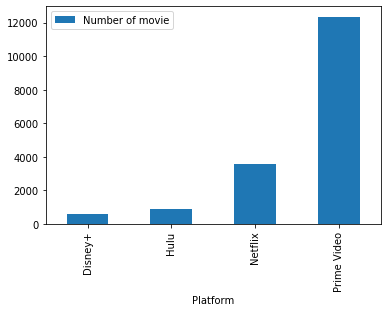

In [83]:
platform_df.sort_values(by = 'Number of movie', inplace = True)
platform_df.plot.bar(x = 'Platform', y = 'Number of movie')

Nhìn vào biểu đồ, chúng ta dễ dàng nhận thấy vị thế dẫn đầu vượt trội của nền tảng Prime Video, vượt xa so với những nền tảng khác về số lượng phim được stream. Nhìn vào dataframe, số lượng phim của nó gần gấp 3 lần so với nền tảng Netflix, và gấp nhiều lần so với hai nền tảng còn lại. Có thể nói rằng, nếu chưa xét đến khía cạnh khác thì Prime Video dễ dàng được đề xuất cho những người dùng mới. Bởi lẽ, chính nguồn phim dồi dào thế này đã đủ để cuốn hút người dùng, người dùng sẽ đặc biệt ấn tượng với con số này và nghĩ đến rằng có thể sẽ tìm được rất nhiều những phim mình yêu thích trên nền tảng này.

### Câu hỏi: Với mỗi nền tảng stream, số lượng phim phân bố theo độ tuổi là như thế nào?
Với câu hỏi này, chúng ta cần phải thực hiện:
- Bước 1: Tiến hành lọc ra những phim thuộc từng nền tảng mà nó được stream và tính toán số lượng phim thuộc từng nhóm độ tuổi.
- Bước 2: Sau khi đã có được những kết quả ở bước 1, tiến hành lập dataframe để biểu thị các nhóm độ tuổi và nền tảng tương ứng của nó chứa bao nhiêu phim trực quan và phục vụ các tính toán sau này.

In [84]:
netflix_age = stream_df[stream_df['Netflix'] == 1]['Age'].value_counts()

hulu_age = stream_df[stream_df['Hulu'] == 1]['Age'].value_counts()

prime_age = stream_df[stream_df['Prime Video'] == 1]['Age'].value_counts()

disney_age = stream_df[stream_df['Disney+'] == 1]['Age'].value_counts()

age_dist = pd.DataFrame()
age_dist = age_dist.assign(Netflix = netflix_age, Hulu = hulu_age, Prime = prime_age, Disney = disney_age)
age_dist.reset_index(inplace = True)
age_dist.rename(columns = {'index' : 'Age'}, inplace = True)

age_dist

,Age,Netflix,Hulu,Prime,Disney
0,NA,1883,313,7375,64
1,18+,752,290,2612,3
2,13+,383,119,819,40
3,7+,323,109,916,179
4,all,130,55,406,277
5,16+,89,17,226,1


Nhìn vào dataframe về số lượng phim phân bố theo độ tuổi của từng nền tảng, chúng ta thêm được một số nhận xét mới:
- Thứ nhất, số lượng phim không được phân độ tuổi ở mỗi nền tảng rất nhiều nếu so với số lượng phim đã được phân độ tuổi. Điều này đã được trình bày trong quá trình tiền xử lý dữ liệu, nghĩa là xét về mặt xử lý, việc chúng ta fill là hợp theo logic, tuy nhiên, khi phân tích sâu hơn thì những phim không được gán độ tuổi có thể làm chúng ta mất đi đánh giá hợp lý nếu đánh giá tổng thể về phân bố độ tuổi hay khi cần đề xuất phim cho người dùng.


- Thứ hai, dễ dàng nhận thấy ở bất kỳ độ tuổi nào, nền tảng Prime Video đều rất vượt trội và bỏ xa so với các nền tảng còn lại. Đồng thời, nếu không xét những phim chưa được gán độ tuổi, đặc biệt số lượng phim trong độ tuổi giới hạn 18+ của Prime Video là rất nhiều. Con số ấn tượng này có thể thể hiện được lượng khán giả mà nền tảng hướng tới chủ yếu là trên 18 tuổi, với những nội dung và kịch bản phim có thể sáng tạo, phát triển về nội dung rất đa dạng để tương thích với góc nhìn và quan điểm của độ tuổi này. Thêm vào đó, đối tượng khán giả ở độ tuổi này cũng là những người thường đi đầu xu thế công nghệ mới, cập nhật thông tin và tương tác với nhau trực tuyến rất thường xuyên, nên việc nhà phát triển nhắm tới đối tượng này cũng là điều dễ hiểu nếu muốn thúc đẩy sự phát triển của mình.

### Câu hỏi: Khi người dùng nhập tiêu đề của một phim, có thể thông báo cho người dùng biết phim đó xuất hiện trên nền tảng nào?
Với loại câu hỏi này, chúng ta cần xây dựng một hàm nhận vào là tiêu đề phim cho người dùng và trả về câu trả lời rằng phim người dùng nhập thuộc nền tảng nào nhằm phục vụ cho mục đích tìm kiếm của người dùng. Đây cũng có thể xem như một câu hỏi truy vấn.

Trong hàm này, tiêu đề phim do người dùng nhập sẽ được dùng để lọc và kiểm chứng trong dataframe ban đầu. Kết quả lọc sau đó sẽ được kiểm tra xem có rỗng hay không tương ứng theo từng nền tảng, sau đó, người dùng sẽ nhận được câu trả lời xuất ra màn hình.

In [85]:
def Find_Platform(film_title, stream_df):
    
    test_stream_df = copy.deepcopy(stream_df)
    
    netflix_movie = test_stream_df[stream_df['Netflix'] == 1] 
    hulu_movie = test_stream_df[stream_df['Hulu'] == 1] 
    prime_movie = test_stream_df[stream_df['Prime Video'] == 1] 
    disney_movie = test_stream_df[stream_df['Disney+'] == 1] 
    
    available_netflix = netflix_movie.loc[netflix_movie['Title'] == (title)]
    available_hulu = hulu_movie.loc[hulu_movie['Title'] == (title)]
    available_prime = prime_movie.loc[prime_movie['Title'] == (title)]
    available_disney = disney_movie.loc[disney_movie['Title'] == (title)]
    
    if len(available_netflix) > 0:
        print('This film is available on' + ' ' + 'Netflix.')
    if len(available_hulu) > 0:
        print('This film is available on' + ' ' + 'Hulu.')
    if len(available_prime) > 0:
        print('This film is available on' + ' ' + 'Prime Video.')
    if len(available_disney) > 0:
        print('This film is available on' + ' ' + 'Disney+.')
        

In [86]:
title = 'The Good, the Bad and the Ugly'
Find_Platform(title, stream_df)

This film is available on Netflix.
This film is available on Prime Video.


### Câu hỏi: Phân bố thể loại theo từng nền tảng phim như thế nào?
Trước tiên, để trả lời câu hỏi này, chúng ta cần phải trực quan được rằng phân bố thể loại trong dữ liệu hiện đang có tình hình như thế nào. Tất nhiên, khi nhìn kĩ vào cột Genres chúng ta sẽ thấy một bộ phim thường gồm nhiều thể loại khác nhau (làm cho bộ phim dễ thu hút khán giả hơn), nhưng ở đây, chúng ta sẽ tách chúng ra, vừa để quan sát, vừa để so sánh xem thể loại phim nào đang chiếm ưu thế và chiếm bao nhiêu trong tổng số các phim.

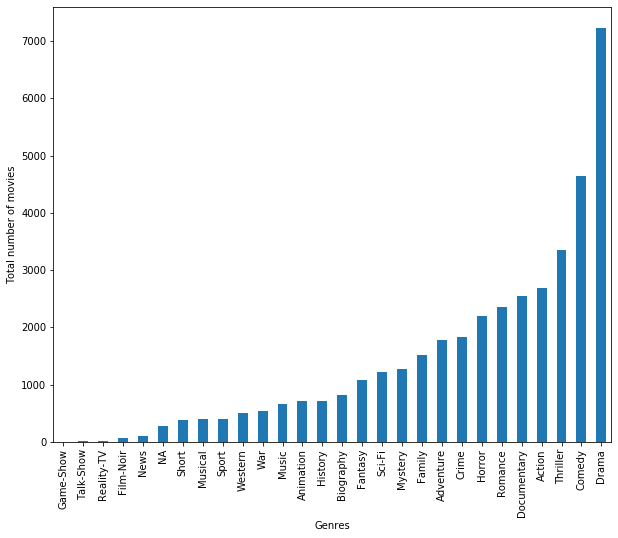

In [87]:
genres_dist = stream_df['Genres'].str.get_dummies(',')
genres_dist = genres_dist.sum().sort_values()
plt.figure(figsize = (10, 8))
genres_dist.plot(kind = "bar")
plt.xlabel('Genres')
plt.ylabel('Total number of movies')
plt.show()

Quan sát biểu đồ, chúng ta nhận thấy top 3 hiện tại đang thuộc về 3 thể loại là Drama, Comedy và Thriller. Nếu nhìn vào thực tế những gì thể hiện trong 3 thể loại này, chúng ta có thể nhận xét đôi lời rằng tại sao chúng lại dẫn đầu.

- Với thể loại Drama, đặc điểm chung về dòng phim này là có thời lượng dài (nếu xét phim chiếu rạp) hoặc nhiều tập. Nhìn lại những bộ phim gần đây, xu hướng Drama trong phim thường xoay quanh cuộc sống của con người với nhiều tình huống bi - hài kịch hay thể hiện tình cảm, sự mâu thuẫn,... nhưng theo chiều hướng cường điệu hóa so với thế giới thực, thoát ly khỏi thế giới thực. Bởi vậy, có những đánh giá cho rằng, thể loại phim này thường nhắm vào những đối tượng khán giả tò mò hoặc thường complaint về cuộc sống trong thế giới thực, mơ mộng về những điều gì đó để thoát ly khỏi thực tế (dù thực ra, có những chi tiết phi lý đến vô cùng). Bên cạnh đó, dòng phim này còn ăn điểm ở bối cảnh, diễn viên và phục trang ăn khách, hợp thời, nên không khó hiểu nó tạo được vị trí dẫn đầu trong danh sách các thể loại phim ăn khách.


- Thể loại Comedy, chúng ta không quá xa lạ với nó. Dòng phim hài dù ở bất kỳ hoàn cảnh nào, thời đại nào, đều có chỗ đứng riêng biệt. Khán giả đến với dòng phim này rất đơn giản, để tìm được tiếng cười, sự hài hước giải trí lành mạnh và tích cực. Nhưng với sự phát triển của mình, dòng phim hài ngày càng có chiều sâu, không đơn thuần chỉ để thu hút tiếng cười, mà tiếng cười trong nó còn là tiếng cười mỉa mai, châm biếm, lồng ghép nhiều tầng ý nghĩa về cuộc sống xã hội, về con người và số phận. Vì thế, cách tiếp cận của dòng phim hài rất đơn giản, trực tiếp vào đối tượng khán giả nhưng tiếng cười sau khi hạ màn lại đọng lại với những dư âm khó phai. Cho nên, vị thế của dòng phim này và sự dẫn đầu của nó là không phải bàn cãi.


- Cuối cùng, thể loại phim Thriller. Dòng phim này khai thác yếu tố cốt lõi và cũng là bản tính của con người: sự tò mò và căng thẳng. Với sự sắp đặt tình huống phim và diễn biến phim tăng dần theo chiều hướng bất khả thi, cài cắm nhiều chi tiết giải thích và thông tin xuyên suốt thời lượng, dòng phim này kích thích trí tưởng tượng và sự hồi hộp trong từng khán giả, làm cho họ như nhập tâm vào bộ phim và đi tìm lời giải cho chính sự băn khoăn của mình. Nhiều nhà phê bình cho rằng, chính yếu tố này đã làm cho thể loại Thriller phát triển rất mạnh, có thể cùng phối hợp với nhiều thể loại phim khác nhau để đem đến cho khán giả nhiều bộ phim đỉnh cao và kích thích 'adrenalin' trong mỗi người lên mức cao nhất. Không cần phải nói thêm nữa, thực sự Thriller đã dần dần bước lên vị thế dẫn đầu của nó trong những năm gần đây 

Sau khi đã có những lập luận và đánh giá như trên, chúng ta thử trực quan xem liệu rằng, những thể loại này có chiếm ưu thế trên các nền tảng phổ biến phim không. Chúng ta cũng sẽ lọc ra những phim thuộc từng nền tảng và phân thể loại như đã thực hiện ở trên.

In [88]:
genres_netflix = stream_df.loc[stream_df['Netflix'] == 1]
genres_netflix_dist = genres_netflix['Genres'].str.get_dummies(',').sum()

genres_hulu = stream_df.loc[stream_df['Hulu'] == 1]
genres_hulu_dist = genres_hulu['Genres'].str.get_dummies(',').sum()

genres_prime = stream_df.loc[stream_df['Prime Video'] == 1]
genres_prime_dist = genres_prime['Genres'].str.get_dummies(',').sum()

genres_disney = stream_df.loc[stream_df['Disney+'] == 1]
genres_disney_dist = genres_disney['Genres'].str.get_dummies(',').sum()

Trực quan những dữ liệu sau quá trình lọc theo từng nền tảng. Chúng ta sẽ sắp xếp các thể loại tăng dần theo độ phổ biến, vì vậy khi trực quan chúng ta chỉ sử dụng 10 phần tử cuối cùng, và sẽ đồng thời hiển thị 4 biểu đồ tương ứng 4 nền tảng để dễ dàng quan sát và đối chiếu.

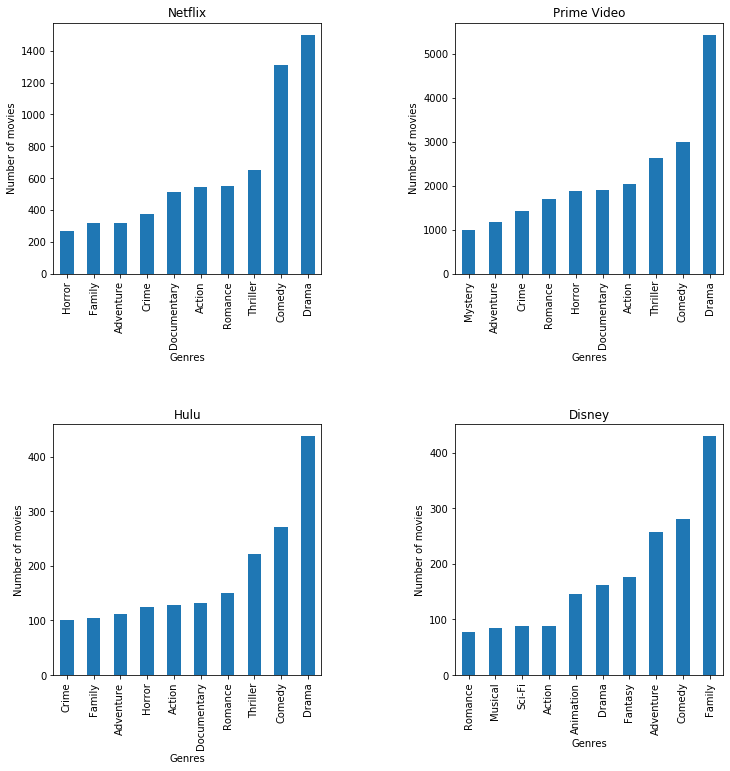

In [89]:
fig , axes = plt.subplots(2,2,figsize = (12,12))
plt.subplots_adjust(hspace = 0.6, wspace = 0.5)    
    
genres_netflix_dist.sort_values().tail(10).plot(kind = 'bar', ax = axes[0, 0])
axes[0,0].set_title('Netflix')
axes[0,0].set_xlabel('Genres')
axes[0,0].set_ylabel('Number of movies')

genres_hulu_dist.sort_values().tail(10).plot(kind = 'bar', ax = axes[1, 0])
axes[1,0].set_title('Hulu')
axes[1,0].set_xlabel('Genres')
axes[1,0].set_ylabel('Number of movies')

genres_prime_dist.sort_values().tail(10).plot(kind = 'bar', ax = axes[0, 1])
axes[0,1].set_title('Prime Video')
axes[0,1].set_xlabel('Genres')
axes[0,1].set_ylabel('Number of movies')

genres_disney_dist.sort_values().tail(10).plot(kind = 'bar', ax = axes[1, 1])
axes[1,1].set_title('Disney')
axes[1,1].set_xlabel('Genres')
axes[1,1].set_ylabel('Number of movies')

plt.show()

Như vậy, khi đã có trong tay những biểu đồ trực quan này, chúng ta càng củng cố thêm được niềm tin trong lập luận về các thể loại dẫn đầu xu hướng ở trên, rằng ở cả 4 nền tảng, những thể loại này chiếm số lượng phim đều dẫn đầu.

# Nhìn lại quá trình thực hiện

- Trong quá trình thực hiện những phân tích, đánh giá trên dữ liệu về các nền tảng phim, nếu xét về phần thu thập và tiền xử lý dữ liệu đều rất đơn giản. Tuy nhiên, khi đi sâu vào phân tích, khó khăn lớn nhất là về rút trích những đặc trưng về tập dữ liệu, để có thể cung cấp được những câu hỏi, những băn khoăn làm sao để mô tả và phát triển dữ liệu tốt nhất, đánh giá xem liệu có thể mang lại niềm tin cho khán giả để lựa chọn và sử dụng những nền tảng này không?


- Mặt khác, với những phân tích và câu hỏi đưa ra, khán giả cũng có thể nắm bắt được tổng quan về những nền tảng này. Khán giả có thể tìm được nền tảng phim hợp lý cho mình dựa theo sự đa dạng của từng nền tảng, dựa vào sự phân bố độ tuổi theo phim trong từng nền tảng để tìm được nền tảng best choice cho riêng mình, hay có thể tìm kiếm được phim mà mình yêu thích trên nền tảng thích hợp. Đồng thời, nhờ vào những quan sát về phân bố thể loại theo nền tảng, việc khán giả liên hệ được với sở thích của chính bản thân được rút ngắn lại, cho phép khán giả trải nghiệm nền tảng phim tốt nhất có thể.


- Vì thời gian tiến hành phân tích diễn ra trong thời gian ngắn nên thật sự có rất nhiều thiếu sót và khó tránh khỏi việc khán giả không thể tìm được những câu trả lời mong muốn. Nếu có thể phân tích trong khoảng thời gian nhiều hơn, hi vọng sẽ mang đến thật nhiều câu hỏi hữu ích cho khán giả và trực quan được nhiều dạng biểu đồ khác nhau để khán giả dễ dàng quan sát và giải tỏa được những băn khoăn của mình trong quá trình lựa chọn những nền tảng phim trực tuyến.